In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=0fc04cc628f694555eee396feeee4152d7b472b407d985931d189ca6c4e480e1
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install scipy

You should consider upgrading via the 'C:\Users\Administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
df = pd.read_csv('housing.csv')
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [10]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

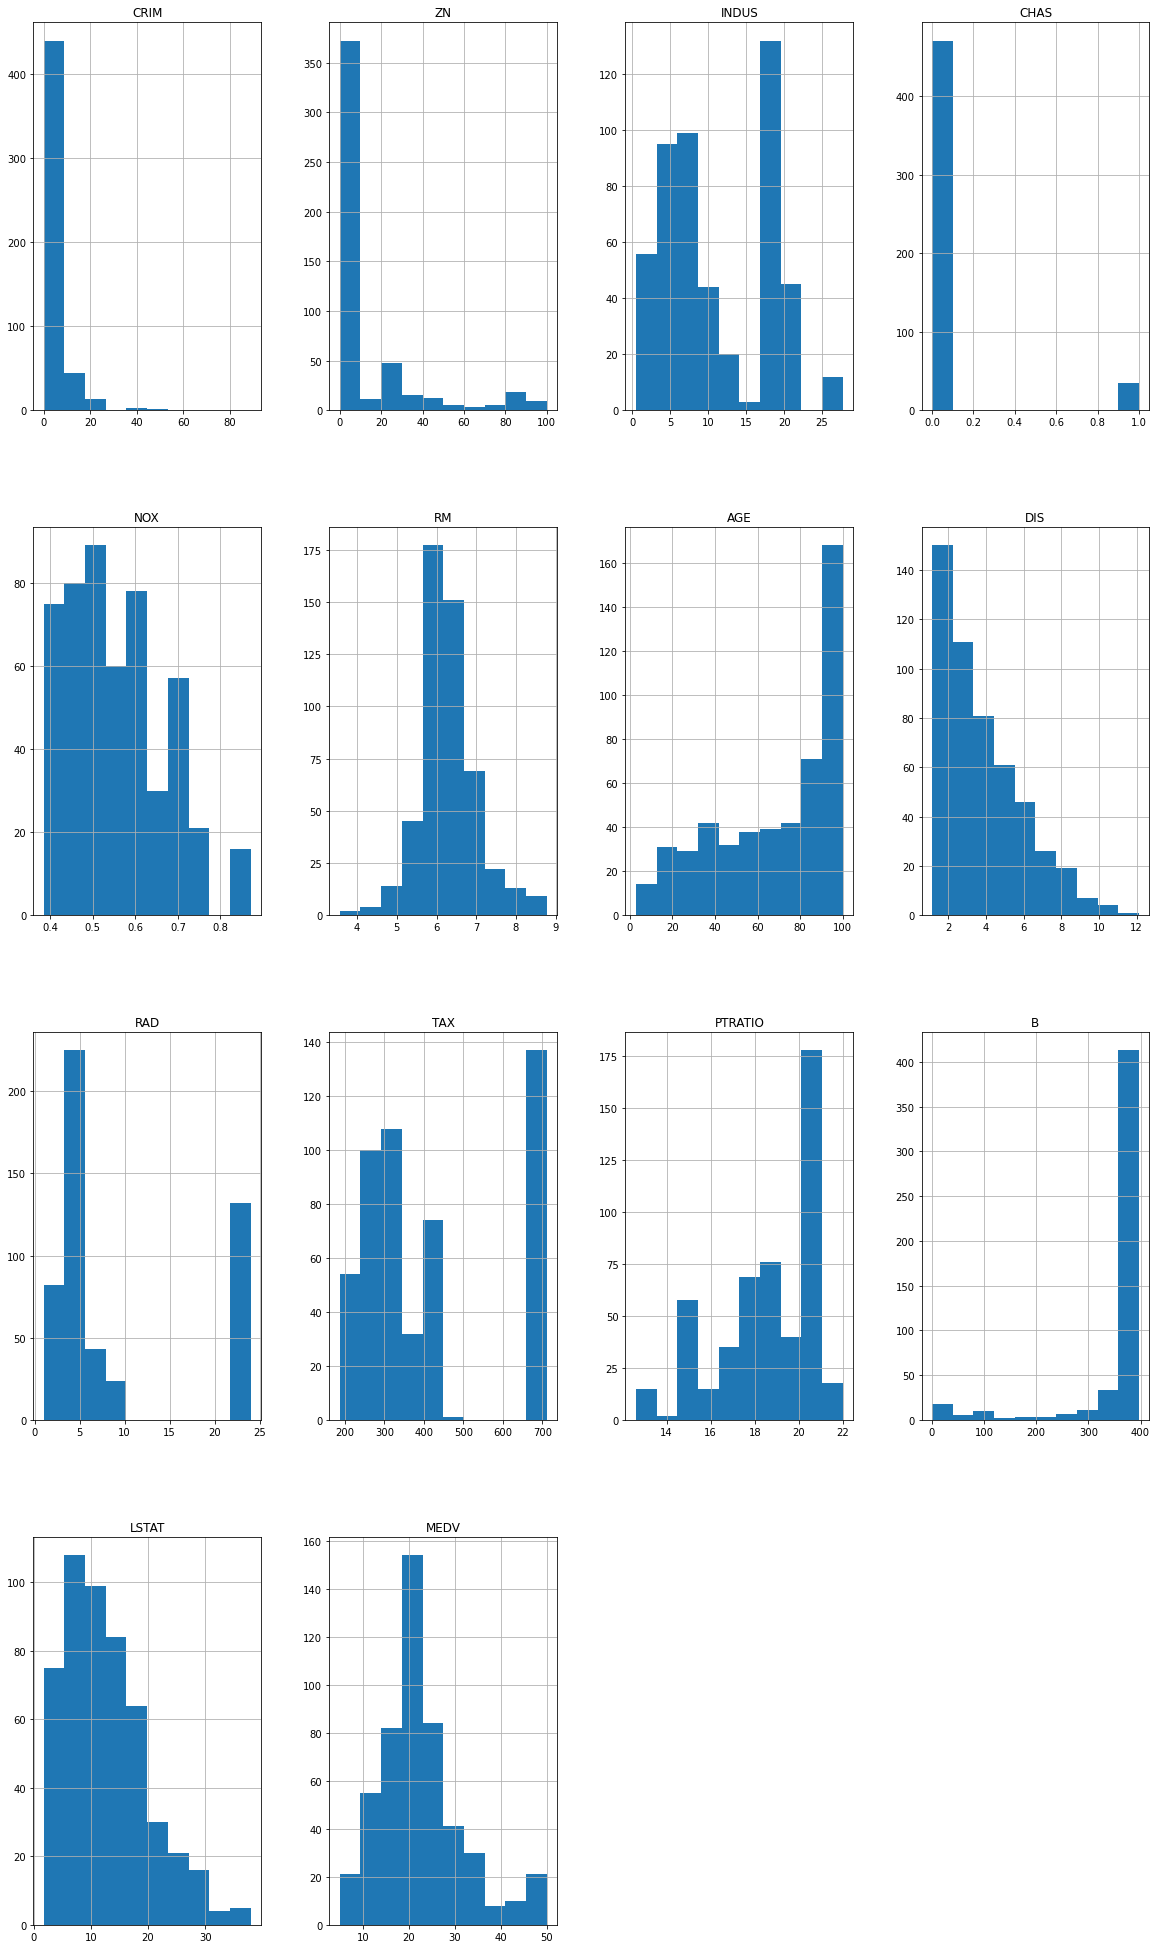

In [16]:
data.hist(figsize=(20,35))

## Splitting Model data with 70% for training and 30% for testing

In [20]:
from sklearn.model_selection import train_test_split
X= np.array(data.iloc[:,0:13])
Y= np.array(data["MEDV"])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=5)

## Using KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsRegressor

#loading the KNN Model
Nn = KNeighborsRegressor(3)

### Model fitting

In [22]:
Nn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### Model Evaluation

In [23]:
pred_Nn = Nn.predict(x_test)

### Hyperparameter Tuning

In [24]:
for i in range(1,50):
    model = KNeighborsRegressor(i)
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred_y, squared=False)
    print("{} error for k = {}".format(mse,i))

<IPython.core.display.Javascript object>

7.97154478854566 error for k = 1


<IPython.core.display.Javascript object>

7.159484875618533 error for k = 2


<IPython.core.display.Javascript object>

7.014927171138291 error for k = 3


<IPython.core.display.Javascript object>

7.004019640065342 error for k = 4


<IPython.core.display.Javascript object>

7.036131375752027 error for k = 5


<IPython.core.display.Javascript object>

7.103650686103268 error for k = 6


<IPython.core.display.Javascript object>

7.249246229196143 error for k = 7


<IPython.core.display.Javascript object>

7.278466403768686 error for k = 8


<IPython.core.display.Javascript object>

7.490296733721186 error for k = 9


<IPython.core.display.Javascript object>

7.573928228851226 error for k = 10


<IPython.core.display.Javascript object>

7.580880154071545 error for k = 11


<IPython.core.display.Javascript object>

7.620709624858009 error for k = 12


<IPython.core.display.Javascript object>

7.702433441773159 error for k = 13


<IPython.core.display.Javascript object>

7.745706188130712 error for k = 14


<IPython.core.display.Javascript object>

7.855546909761407 error for k = 15


<IPython.core.display.Javascript object>

7.970845764140948 error for k = 16


<IPython.core.display.Javascript object>

8.00708692880329 error for k = 17


<IPython.core.display.Javascript object>

8.05951400020052 error for k = 18


<IPython.core.display.Javascript object>

8.105972848197592 error for k = 19


<IPython.core.display.Javascript object>

8.171623447622684 error for k = 20


<IPython.core.display.Javascript object>

8.208766061680672 error for k = 21


<IPython.core.display.Javascript object>

8.266010100575647 error for k = 22


<IPython.core.display.Javascript object>

8.280897264278922 error for k = 23


<IPython.core.display.Javascript object>

8.326448746059764 error for k = 24


<IPython.core.display.Javascript object>

8.38105978099617 error for k = 25


<IPython.core.display.Javascript object>

8.410954693047014 error for k = 26


<IPython.core.display.Javascript object>

8.478704509976565 error for k = 27


<IPython.core.display.Javascript object>

8.50999986845734 error for k = 28


<IPython.core.display.Javascript object>

8.538275555508479 error for k = 29


<IPython.core.display.Javascript object>

8.57421797961705 error for k = 30


<IPython.core.display.Javascript object>

8.599468444172452 error for k = 31


<IPython.core.display.Javascript object>

8.616512206922689 error for k = 32


<IPython.core.display.Javascript object>

8.615421855795727 error for k = 33


<IPython.core.display.Javascript object>

8.6394479574174 error for k = 34


<IPython.core.display.Javascript object>

8.668090456321325 error for k = 35


<IPython.core.display.Javascript object>

8.710050513540338 error for k = 36


<IPython.core.display.Javascript object>

8.718258951585424 error for k = 37


<IPython.core.display.Javascript object>

8.73453661426121 error for k = 38


<IPython.core.display.Javascript object>

8.73394194177396 error for k = 39


<IPython.core.display.Javascript object>

8.738089791196538 error for k = 40


<IPython.core.display.Javascript object>

8.747832356642228 error for k = 41


<IPython.core.display.Javascript object>

8.756251724223462 error for k = 42


<IPython.core.display.Javascript object>

8.757243221295424 error for k = 43


<IPython.core.display.Javascript object>

8.77507943271184 error for k = 44


<IPython.core.display.Javascript object>

8.790125037827208 error for k = 45


<IPython.core.display.Javascript object>

8.812499208822205 error for k = 46


<IPython.core.display.Javascript object>

8.821646387484796 error for k = 47


<IPython.core.display.Javascript object>

8.828821656839208 error for k = 48


<IPython.core.display.Javascript object>

8.82175940968693 error for k = 49


In [25]:
# Error for KNN Algorithm

mse_Nn = sklearn.metrics.mean_squared_error(y_test, pred_Nn,squared=False)
print("The Error for K-NN = {}".format(mse_Nn))

<IPython.core.display.Javascript object>

The Error for K-NN = 7.014927171138291
